In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

def plot_polygon(shp, edge, face):
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')

    for shape in list(shp.iterShapes()):
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, edgecolor=edge, facecolor=face, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, edgecolor=edge, facecolor=face, alpha=1.0, zorder=2)
                ax.add_patch(patch)
    plt.xlim(shp.bbox[0],shp.bbox[2])
    plt.ylim(shp.bbox[1],shp.bbox[3])

bbox
parts
points
shapeType


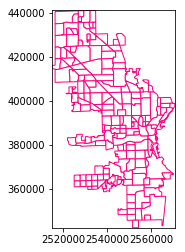

In [2]:
hood_shp = shapefile.Reader('../shape/neighborhood/neighborhood')
for name in dir(hood_shp.shape(3)):
    if not name.startswith('_'):
        print(name)
plot_polygon(hood_shp,[1,0,0.5],[1,1,1])

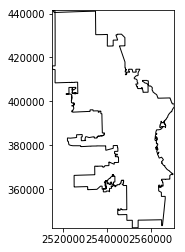

In [3]:
city_shp = shapefile.Reader('../shape/citylimit/citylimit')
plot_polygon(city_shp,[0,0,0],[1,1,1])

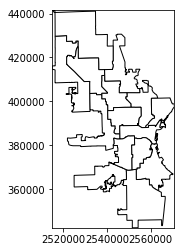

In [4]:
ald_shp = shapefile.Reader("../shape/ald2018/alderman")
plot_polygon(ald_shp,[0,0,0],[1,1,1])

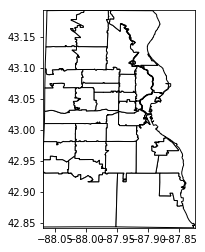

In [5]:
zip_shp = shapefile.Reader("../shape/mke_zipcode/Zip_Code_Tabulation_Areas_ZCTA")
plot_polygon(zip_shp,[0,0,0],[1,1,1])

In [6]:
zip_shp.records()

[[1, '', 52564.11700439453, 1876.848700314904],
 [2, '53110', 147473993.0668335, 90988.28345256479],
 [3, '53129', 154755297.24163818, 75994.16916137414],
 [4, '53130', 89680062.46551514, 43245.893045119024],
 [5, '53132', 969174106.1090088, 150197.9561992706],
 [6, '53154', 782033252.5537109, 147722.5215403766],
 [7, '53172', 141179666.8330078, 69376.81303807783],
 [8, '53202', 61489158.160461426, 75952.1853126774],
 [9, '53203', 12285419.450683594, 20511.69168635271],
 [10, '53204', 90779674.56640625, 48535.6514626846],
 [11, '53205', 40489338.50109863, 37110.74418380409],
 [12, '53206', 74299367.37756348, 41541.01460329789],
 [13, '53207', 272356000.0093994, 121890.38536981004],
 [14, '53208', 110010178.45825195, 49639.713294407695],
 [15, '53209', 297376704.1109009, 138369.727602925],
 [16, '53210', 70125702.63311768, 49111.58343361808],
 [17, '53211', 109151451.75738525, 72027.64693344332],
 [18, '53212', 114135413.6418457, 57800.341436232826],
 [19, '53213', 109826961.05389404, 6

In [7]:
ald_shp.records()

[['1', 1, 4, 'Ashanti Hamilton', 191514947.833, 105162.729704],
 ['5', 5, 2, 'Nikiya Dodd', 281658556.963, 144156.273302],
 ['9', 9, 1, 'Chantia Lewis', 402930120.542, 111673.476706],
 ['14', 14, 1, 'Tony Zielinski', 163343344.173, 92359.6164002],
 ['11', 11, 1, 'Mark A. Borkowski', 178558742.677, 115427.995355],
 ['13', 13, 2, 'Terry L. Witkowski', 327034644.642, 105347.534916],
 ['7', 7, 2, 'Khalif J. Rainey', 119463384.804, 63524.5552411],
 ['6', 6, 3, 'Milele A. Coggs', 132838698.992, 80516.5328422],
 ['2', 2, 3, 'Cavalier Johnson', 177244328.985, 79515.3111091],
 ['10', 10, 4, 'Michael J. Murphy', 198687237.823, 122577.159286],
 ['3', 3, 4, 'Nik Kovac', 96381664.9587, 51437.1235993],
 ['15', 15, 1, 'Russell W. Stamper, II', 121666337.36, 55135.6404749],
 ['4', 4, 2, 'Robert J. Bauman', 105343354.091, 92813.8827542],
 ['8', 8, 3, 'Robert G. Donovan', 106050621.171, 61654.9228708],
 ['12', 12, 4, 'Jose G. Perez', 95546603.2584, 50804.1292432]]

ValueError: A LinearRing must have at least 3 coordinate tuples

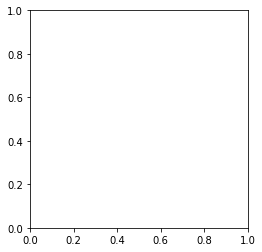

In [8]:
from shapely.geometry import LinearRing
from descartes.patch import PolygonPatch
dime = shapefile.Reader('../shape/dime/dime')
#dime.shapeTypeName # polyline
#dime.records()

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')

for shape in dime.shapes():
    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        ring = LinearRing(shape.points)
        x,y=ring.xy
        #patch = PolygonPatch(ring, edgecolor=[0,0,0], facecolor=[1,1,1], alpha=1.0, zorder=2)
        ax.plot(x,y,color=[1,1,1],alpha=0.7,linewidth=3,solid_capstyle='round',zorder=2)
    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            ring = LinearRing(shape.points[i0:i1+1])
            patch = PolygonPatch(ring, edgecolor=[0,0,0], facecolor=[1,1,1], alpha=1.0, zorder=2)
            ax.add_patch(patch)
plt.xlim(shp.bbox[0],shp.bbox[2])
plt.ylim(shp.bbox[1],shp.bbox[3])